<a href="https://colab.research.google.com/github/pritish17-pixel/movieapp/blob/main/CNN_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)


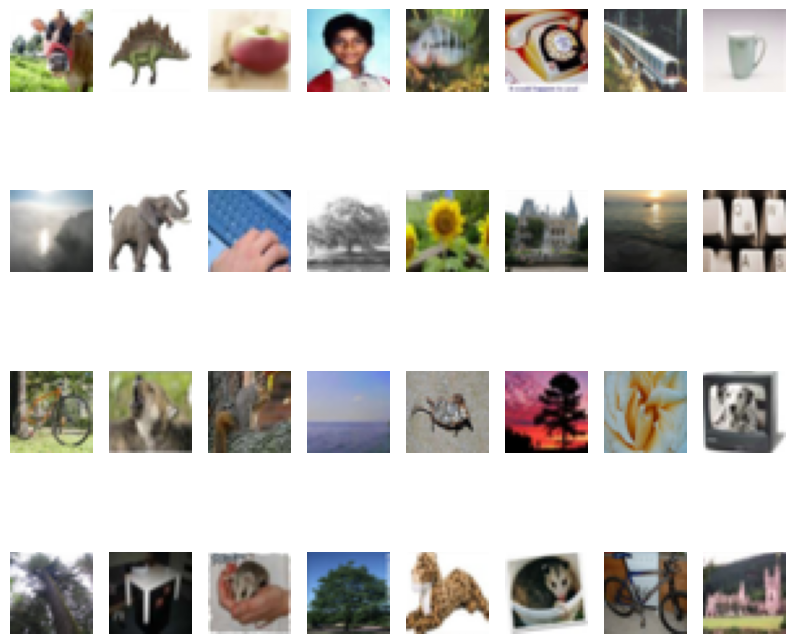

In [ ]:
plt.figure(figsize=(10, 9))

num_rows = 4
num_cols =  8

for i in range(num_rows*num_cols):
  ax = plt.subplot(num_rows, num_cols,i+1)
  plt.imshow(x_train[i,:,:])
  plt.axis("off")

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print('Original (integer) label for the first training sample: ', y_train[0])

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

print('After conversion to categorical one-hot encoded labels:', y_train[0])

Original (integer) label for the first training sample:  [19]
After conversion to categorical one-hot encoded labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
@dataclass(frozen=True)
class Datasetconfig:
  NUM_CLASSES: int = 10
  IMG_HEIGHT:  int = 32
  IMG_WIDTH:   int = 32
  NUM_CHANNELS:int = 3

@dataclass(frozen=True)
class Trainingconfig:
  EPOCHS:        int = 5
  BATCH_SIZE:    int = 256
  LEARNING_RATE: float = 0.001

In [ ]:
def cnn_model(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))





    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
model = cnn_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 8192)             

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=Trainingconfig.BATCH_SIZE,
                    epochs=Trainingconfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                    )

Epoch 1/5
137/137 [==============================] - 11s 59ms/step - loss: 4.6056 - accuracy: 0.0090 - val_loss: 4.6059 - val_accuracy: 0.0086
Epoch 2/5
137/137 [==============================] - 4s 29ms/step - loss: 4.6053 - accuracy: 0.0101 - val_loss: 4.6062 - val_accuracy: 0.0086
Epoch 3/5
137/137 [==============================] - 4s 28ms/step - loss: 4.6052 - accuracy: 0.0105 - val_loss: 4.6065 - val_accuracy: 0.0086
Epoch 4/5
137/137 [==============================] - 4s 30ms/step - loss: 4.6052 - accuracy: 0.0104 - val_loss: 4.6068 - val_accuracy: 0.0081
Epoch 5/5
137/137 [==============================] - 4s 29ms/step - loss: 4.6052 - accuracy: 0.0098 - val_loss: 4.6069 - val_accuracy: 0.0084


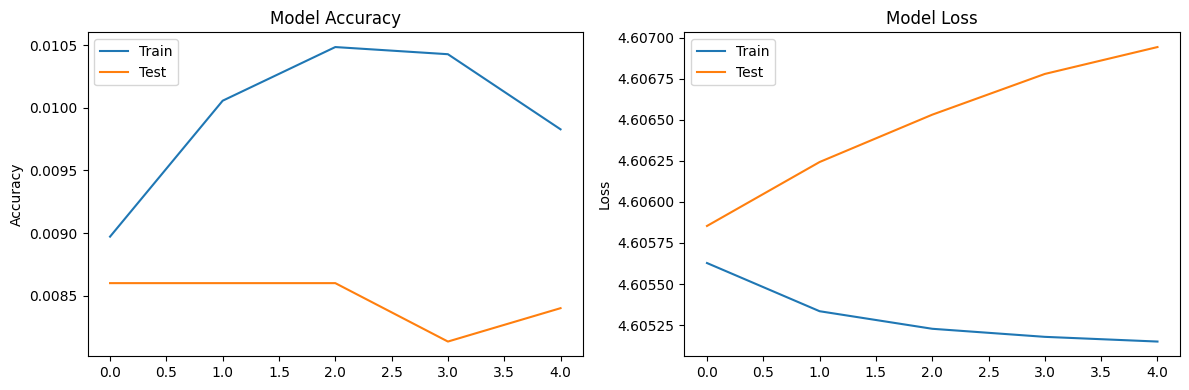

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(history)